In [7]:
##Bu uygulama Udemy de bulunan Enes Zengin'e ait Python ile Makine Öğrenmesi kursu egzersizidir
import numpy as np

data=np.loadtxt('seeds_dataset.txt')

data

array([[15.26  , 14.84  ,  0.871 , ...,  2.221 ,  5.22  ,  1.    ],
       [14.88  , 14.57  ,  0.8811, ...,  1.018 ,  4.956 ,  1.    ],
       [14.29  , 14.09  ,  0.905 , ...,  2.699 ,  4.825 ,  1.    ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  8.315 ,  5.056 ,  3.    ],
       [11.84  , 13.21  ,  0.8521, ...,  3.598 ,  5.044 ,  3.    ],
       [12.3   , 13.34  ,  0.8684, ...,  5.637 ,  5.063 ,  3.    ]])

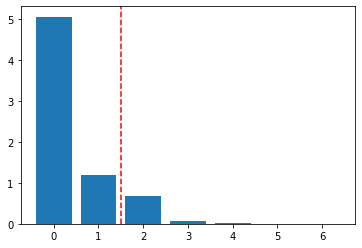

In [8]:
area=data[:,0]
length=data[:,3]
width=data[:,4]
geometry=data[:,3:5]

import matplotlib.pyplot as plt

data2=data[:,0:7]
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler=StandardScaler()
pca=PCA()
pipeline=make_pipeline(scaler,pca)
pipeline.fit(data2)

features=range(pca.n_components_)
plt.bar(features,pca.explained_variance_)
plt.xticks(features)
plt.axvline(x=1.5,ls='--',c='r')
plt.show()

In [9]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(data2)
transformed=pca.transform(data2)
transformed.shape

(210, 2)

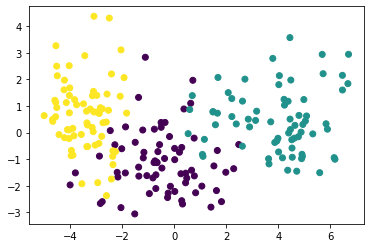

In [10]:
location=data[:,-1]

import matplotlib.pyplot as plt

x=transformed[:,0]
y=transformed[:,1]
plt.scatter(x,y,c=location)
plt.show()

In [11]:
#Kelime sıklık dizileri (word frequency)
#Wikipedia uygulaması
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

svd=TruncatedSVD(n_components=50)
kmeans=KMeans(n_clusters=5)
pipeline=make_pipeline(svd,kmeans)

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

data=pd.read_csv('wikipedia-vectors.csv',index_col=0)
articles=csr_matrix(data.transpose())
titles=list(data.columns)

pipeline.fit(articles)
labels=pipeline.predict(articles)
data_new=pd.DataFrame({'labels':labels,'article':titles})
data_new.sort_values('labels')



,labels,article
59,0,Adam Levine
50,0,Chad Kroeger
51,0,Nate Ruess
52,0,The Wanted
53,0,Stevie Nicks
58,0,Sepsis
55,0,Black Sabbath
56,0,Skrillex
57,0,Red Hot Chili Peppers
54,0,Arctic Monkeys
